# 시각화
## 학습목표
- 시각화 패키지 : matplot, pyplot
- 고급 시각화 패키지 : seaborn
- 지도 시각화 : folium
- Numpy, Pandas 이용해 분석한 내용 시각화

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

numpy version: 1.20.1
pandas version: 1.2.4


In [6]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

### Plot의 유형
- line : 데이터가 시간, 순서 등에 따라서 어떻게 변하는지를 보여주는 시각화
    - line option : color, marker, line style ...
- area
- surface
- bar
- hist
- box etc...

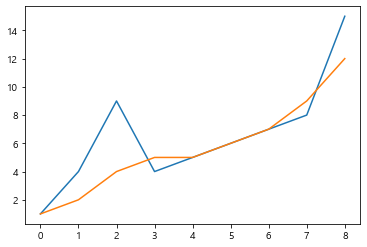

In [10]:
plt.figure() 
plt.plot([1,4,9,4,5,6,7,8,15]) # y축 데이터만
plt.plot([1,2,4,5,5,6,7,9,12])

plt.show()
plt.close()

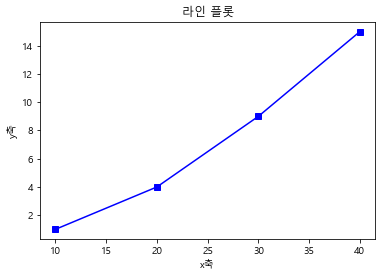

In [11]:
plt.figure()
plt.title('라인 플롯')
plt.plot([10,20,30,40],[1,4,9,15],'bs-') # x축과 y축 지정

plt.xlabel('x축')
plt.ylabel('y축')

plt.show()
plt.close()

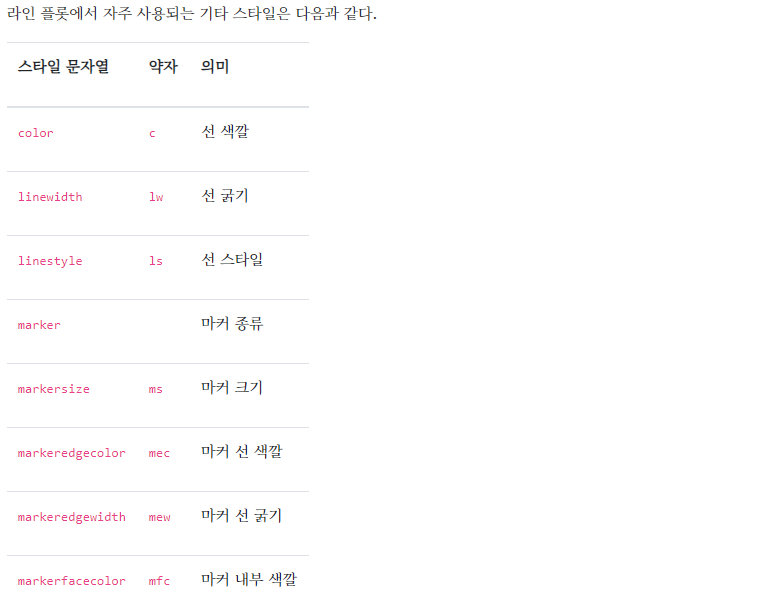

In [12]:
from IPython.display import Image
Image('c:/img/line_style.png', width = 700)

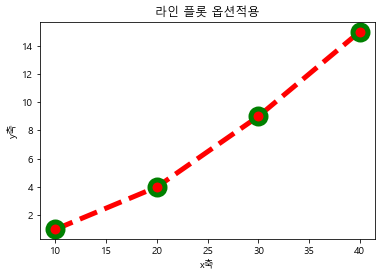

In [19]:
plt.figure()
plt.title('라인 플롯 옵션적용')
plt.plot([10,20,30,40],[1,4,9,15],
         c='r',
        lw=5,
        ls='--',
        marker = 'o',
        ms=15,
        mec='g',
        mew=5) 

plt.xlabel('x축')
plt.ylabel('y축')

plt.show()
plt.close()

- 시도별 전출입 인구수.xlsx를 이용한 라인플롯
- fillna(대체값 | 'missing' |(fill gaps forward or backward) ffill bfill)

In [56]:
# 데이터 불러오기
dataset = pd.read_excel('C:/Users/whgud/data/시도별 전출입 인구수.xlsx')
dataset.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [57]:
dataset = dataset.fillna(method = 'ffill')
dataset.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [58]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋을 만든다면?

mask = (dataset['전출지별'] == '서울특별시')&(dataset['전입지별']!='서울특별시')
seoul_frm = dataset[mask]
seoul_frm.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [59]:
# 서울 데이터프레임에서 전출지별 열 삭제
seoul_frm = seoul_frm.drop(['전출지별'],axis=1)
seoul_frm.head()

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [60]:
# 전입지별 인덱스 이름을 전입지로 변경한다면?
seoul_frm.rename({'전입지별':'전입지'},axis=1, inplace=True)
seoul_frm.head()

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [61]:
# 전입지를 인덱스로 만든다면?
seoul_frm.set_index(['전입지'],inplace=True)
seoul_frm.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


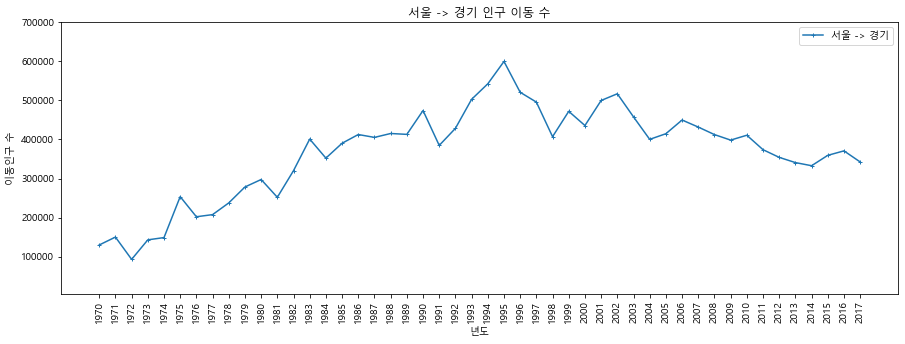

In [86]:
# 경기도 이동한 인구 데이터값만 선택해서 시각화
plt.figure(figsize = (15,5))
datas=seoul_frm.loc['경기도']
plt.plot(seoul_frm.loc['경기도'],marker='+',markersize = 4) # 전입지가 경기도인 값만 추출
plt.title('서울 -> 경기 인구 이동 수') # 그래프 이름 지정
plt.xlabel('년도') # x축 이름지정
plt.ylabel('이동인구 수') # y축 이름지정
plt.xticks(rotation='vertical') # x축 라벨을 세로로
plt.legend(labels=['서울 -> 경기'], loc = 'best') # 범례 지정

plt.ylim(5000,700000)
plt.show()
plt.close()

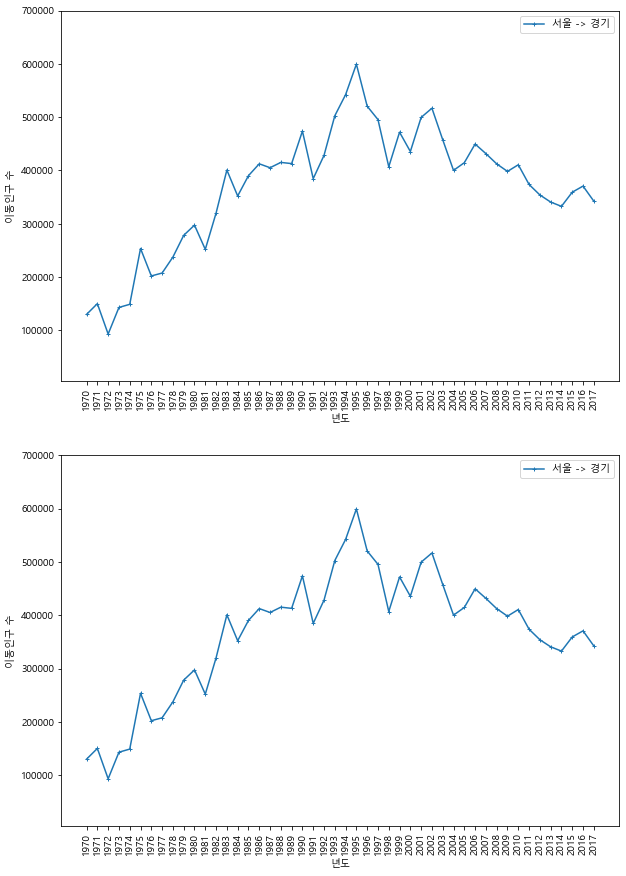

In [89]:
# subplot 이용한 시각화
fig = plt.figure(figsize = (10,15))

ax01 = fig.add_subplot(2,1,1)
ax02 = fig.add_subplot(2,1,2)


ax01.plot(seoul_frm.loc['경기도'],marker='+',markersize = 4) # 전입지가 경기도인 값만 추출
ax01.set_xlabel('년도') # x축 이름지정
ax01.set_ylabel('이동인구 수') # y축 이름지정
ax01.set_xticklabels(labels=datas.index, rotation='vertical') # x축 라벨을 세로로
ax01.legend(labels=['서울 -> 경기'], loc = 'best') # 범례 지정
ax01.set_ylim(5000,700000)

ax02.plot(seoul_frm.loc['경기도'],marker='+',markersize = 4) # 전입지가 경기도인 값만 추출
ax02.set_xlabel('년도') # x축 이름지정
ax02.set_ylabel('이동인구 수') # y축 이름지정
ax02.set_xticklabels(labels=datas.index, rotation='vertical') # x축 라벨을 세로로
ax02.legend(labels=['서울 -> 경기'], loc = 'best') # 범례 지정
ax02.set_ylim(5000,700000)

plt.show()
plt.close()

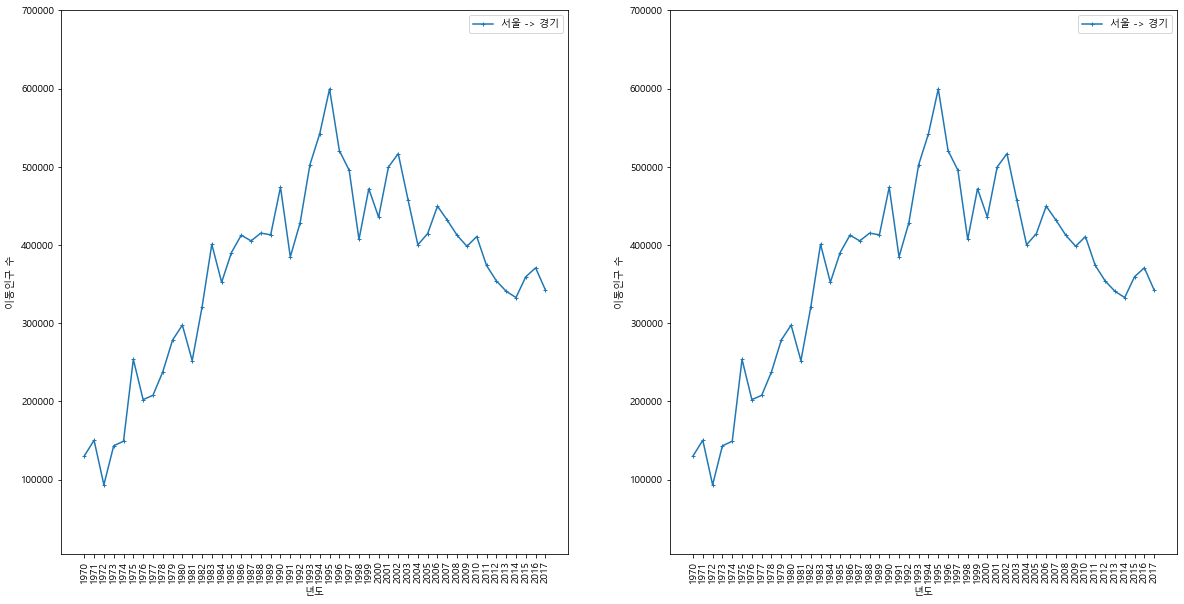

In [93]:
# subplot 이용한 시각화2
fig = plt.figure(figsize = (20,10))

ax01 = fig.add_subplot(1,2,1) # 어떻게 지정하는지에 따라 그래프 나오는 형태가 바뀜
ax02 = fig.add_subplot(1,2,2)


ax01.plot(seoul_frm.loc['경기도'],marker='+',markersize = 4) # 전입지가 경기도인 값만 추출
ax01.set_xlabel('년도') # x축 이름지정
ax01.set_ylabel('이동인구 수') # y축 이름지정
ax01.set_xticklabels(labels=datas.index, rotation='vertical') # x축 라벨을 세로로
ax01.legend(labels=['서울 -> 경기'], loc = 'best') # 범례 지정
ax01.set_ylim(5000,700000)

ax02.plot(seoul_frm.loc['경기도'],marker='+',markersize = 4) # 전입지가 경기도인 값만 추출
ax02.set_xlabel('년도') # x축 이름지정
ax02.set_ylabel('이동인구 수') # y축 이름지정
ax02.set_xticklabels(labels=datas.index, rotation='vertical') # x축 라벨을 세로로
ax02.legend(labels=['서울 -> 경기'], loc = 'best') # 범례 지정
ax02.set_ylim(5000,700000)

plt.show()
plt.close()

충청남도, 경상북도, 강원도로 이동한 인구 데이터 값만 선택해서 하나의 figure에 출력한다면?


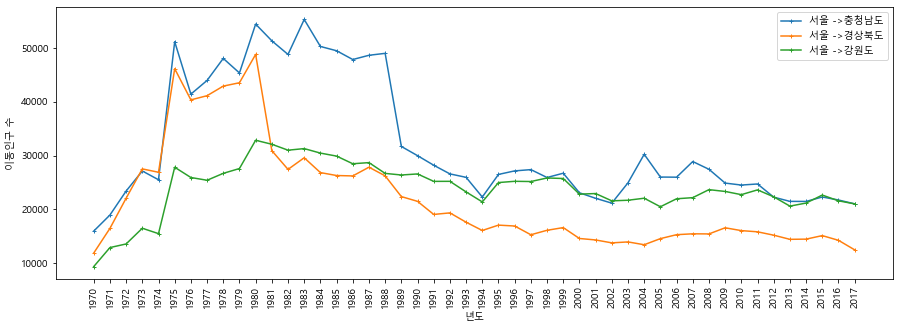

In [107]:
# 충청남도, 경상북도, 강원도로 이동한 인구 데이터 값만 선택해서 하나의 figure에 출력한다면?
print("충청남도, 경상북도, 강원도로 이동한 인구 데이터 값만 선택해서 하나의 figure에 출력한다면?")

x_year = list(map(str,range(1970,2018)))

plt.figure(figsize = (15,5))

plt.plot(x_year, seoul_frm.loc['충청남도'],marker='+',markersize = 4,label='서울 ->충청남도') # 전입지가 충청남도인 값만 추출
plt.plot(x_year, seoul_frm.loc['경상북도'],marker='+',markersize = 4,label='서울 ->경상북도') # 전입지가 경상북도인 값만 추출
plt.plot(x_year, seoul_frm.loc['강원도'],marker='+',markersize = 4,label='서울 ->강원도') # 전입지가 강원도인 값만 추출


plt.xlabel('년도') # x축 이름지정
plt.ylabel('이동인구 수') # y축 이름지정
plt.xticks(rotation='vertical') # x축 라벨을 세로로

plt.legend(loc = 'best') # 범례 위치 지정


plt.show()
plt.close()

In [109]:
# matplot에 내장된 색의 종류
colors = {}
for name, c in matplotlib.colors.cnames.items():
    colors[name]=c
colors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

### bar plot
- plt.bar(X,Y)
- X : 보통 범주형 데이터인 경우가 많다.

In [110]:
import seaborn as sns
iris_datasets = sns.load_dataset('iris')
titanic_datasets = sns.load_dataset('titanic')

선실등급에 따른 생존자 수를 시각화한다면?


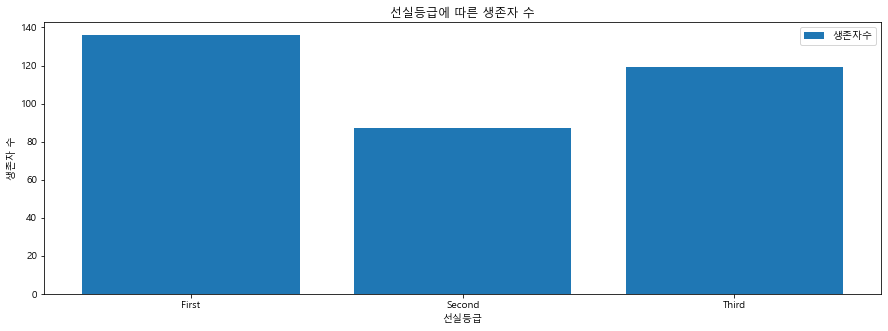

In [127]:
# 선실등급에 따른 생존자 수를 시각화한다면?
print("선실등급에 따른 생존자 수를 시각화한다면?")

# 선실등급으로 class사용시,
plt.figure(figsize = (15,5))
class_survived_data=titanic_datasets.groupby('class').agg('sum')['survived']
plt.bar(class_survived_data.index,class_survived_data.values)
plt.title('선실등급에 따른 생존자 수')
plt.xlabel('선실등급') # x축 이름지정
plt.ylabel('생존자 수') # y축 이름지정


plt.legend(labels=['생존자수'],loc = 'best') # 범례 위치 지정


plt.show()
plt.close()

선실등급에 따른 생존자 수를 시각화한다면?


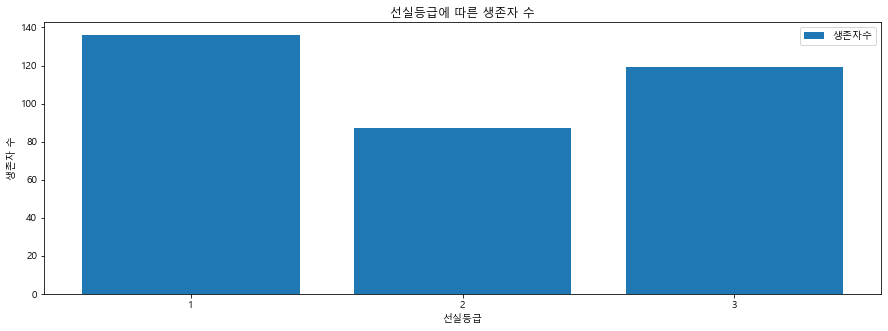

In [129]:
# 선실등급에 따른 생존자 수를 시각화한다면?
print("선실등급에 따른 생존자 수를 시각화한다면?")

# 선실등급으로 pclass사용시,
plt.figure(figsize = (15,5))
X=titanic_datasets.groupby('pclass').agg('sum')['survived'].index
Y=titanic_datasets.groupby('pclass').agg('sum')['survived'].values
plt.bar(X,Y)
plt.title('선실등급에 따른 생존자 수')
plt.xlabel('선실등급') # x축 이름지정
plt.ylabel('생존자 수') # y축 이름지정
plt.xticks(X)

plt.legend(labels=['생존자수'],loc = 'best') # 범례 위치 지정


plt.show()
plt.close()

선실등급에 따른 생존자 수를 시각화한다면?


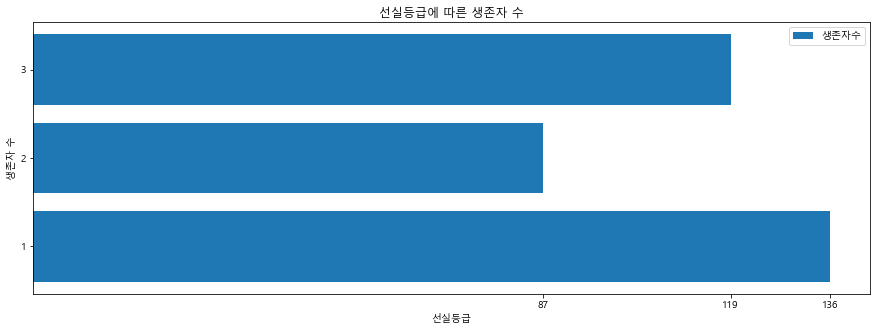

In [131]:
# 선실등급에 따른 생존자 수를 시각화한다면?
print("선실등급에 따른 생존자 수를 시각화한다면?")

# 선실등급으로 pclass사용 & 가로 막대그래프로 표현시,
plt.figure(figsize = (15,5))
X=titanic_datasets.groupby('pclass').agg('sum')['survived'].index
Y=titanic_datasets.groupby('pclass').agg('sum')['survived'].values
plt.barh(X,Y)
plt.title('선실등급에 따른 생존자 수')
plt.xlabel('선실등급') # x축 이름지정
plt.ylabel('생존자 수') # y축 이름지정
plt.xticks(Y)
plt.yticks(X)
plt.legend(labels=['생존자수'],loc = 'best') # 범례 위치 지정


plt.show()
plt.close()

In [144]:
# 서브셋을 만들어보자
# 조건1. seoul_frm에서 충청남도, 경상북도, 강원도, 전라남도만 추출
# 조건2. 2010년 ~ 2017년 데이터만
subset_frm=seoul_frm.loc[['충청남도','경상북도','강원도','전라남도'],'2010':'2017']
subset_frm

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,16042,15818,15191,14420,14456,15113,14236,12464
강원도,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,16429,15974,14765,14187,14591,14598,13065,12426


In [146]:
t_subset_frm=subset_frm.T # 행열 전환
t_subset_frm

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


<Figure size 432x288 with 0 Axes>

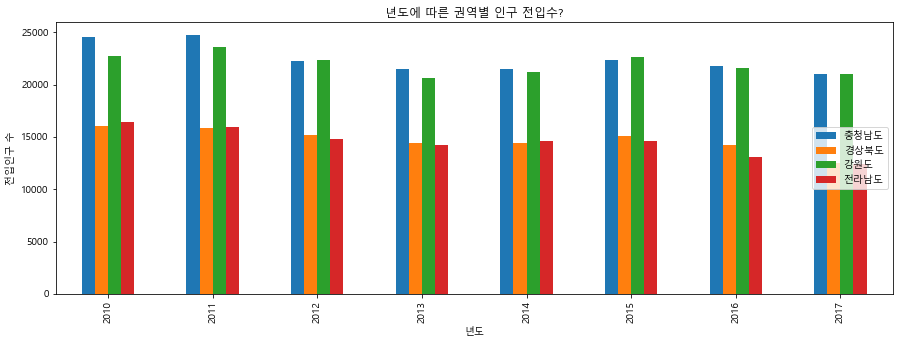

In [151]:
# 년도에 따른 권역별 인구 전입수?

plt.figure()

# 데이터프레임내에 plot함수 사용
t_subset_frm.plot(kind='bar',
                 figsize=(15,5)) 

plt.title('년도에 따른 권역별 인구 전입수?')
plt.xlabel('년도')
plt.ylabel('전입인구 수')
plt.legend(loc='right')

plt.show()
plt.close()

#### 범례 위치 지정! 
- Location String   : Location Code

- 'best'            : 0
- 'upper right'     :1
- 'upper left'      2
- 'lower left'      3
- 'lower right'     4
- 'right'           5
- 'center left'     6
- 'center right'    7
- 'lower center'    8
- 'upper center'    9
- 'center'          10


,2010,2011,2012,2013,2014,2015,2016,2017,sum
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


,2010,2011,2012,2013,2014,2015,2016,2017,sum
전입지,,,,,,,,,
충청남도,24522,24723,22269,21486,21473,22299,21741,21020,179533
강원도,22736,23624,22332,20601,21173,22659,21590,21016,175731
경상북도,16042,15818,15191,14420,14456,15113,14236,12464,117740
전라남도,16429,15974,14765,14187,14591,14598,13065,12426,116035


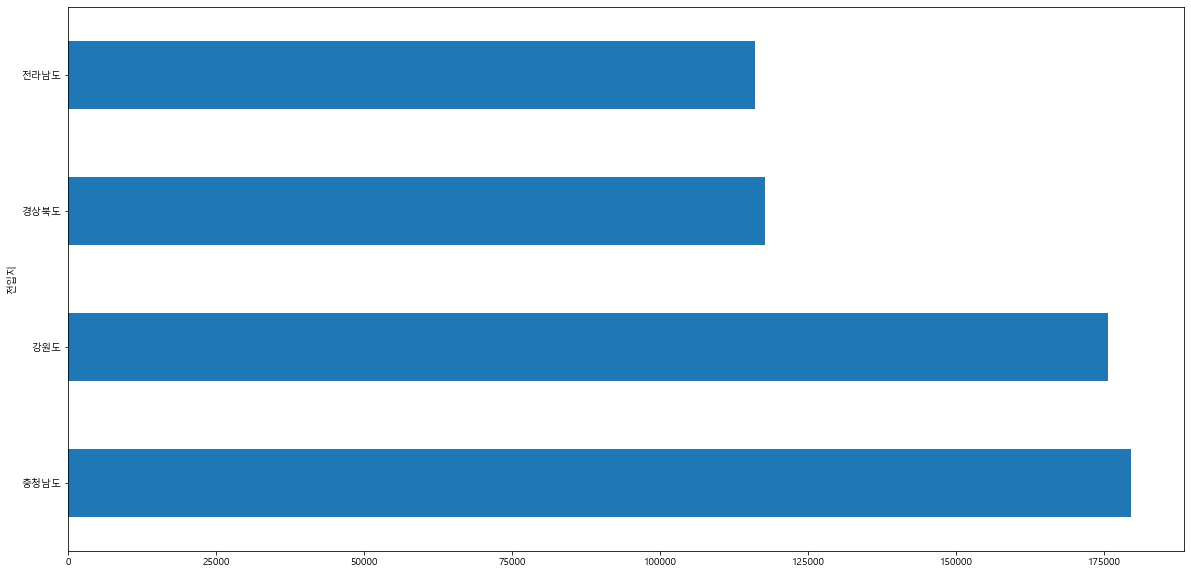

In [171]:
# 전입인구 수의 합계를 구해서 새로운 합계열을 추가하고
# 합계에 대한 가장 큰 값으로 정렬
# 수평 막대 그래프로 시각화한다면?
display(subset_frm)
subset_frm['sum']=t_subset_frm.sum() # 합계열 추가 
# subset_frm['sum'] = subset_frm.sum(axis=1)
sorted_subset=subset_frm.sort_values(by='sum',ascending=False)
display(sorted_subset) # 합계의 가장 큰값으로 정렬

plt.figure()
sorted_subset['sum'].plot(kind='barh',
                         figsize=(20,10))

plt.show()
plt.close()

In [172]:
iris_datasets

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


<Figure size 432x288 with 0 Axes>

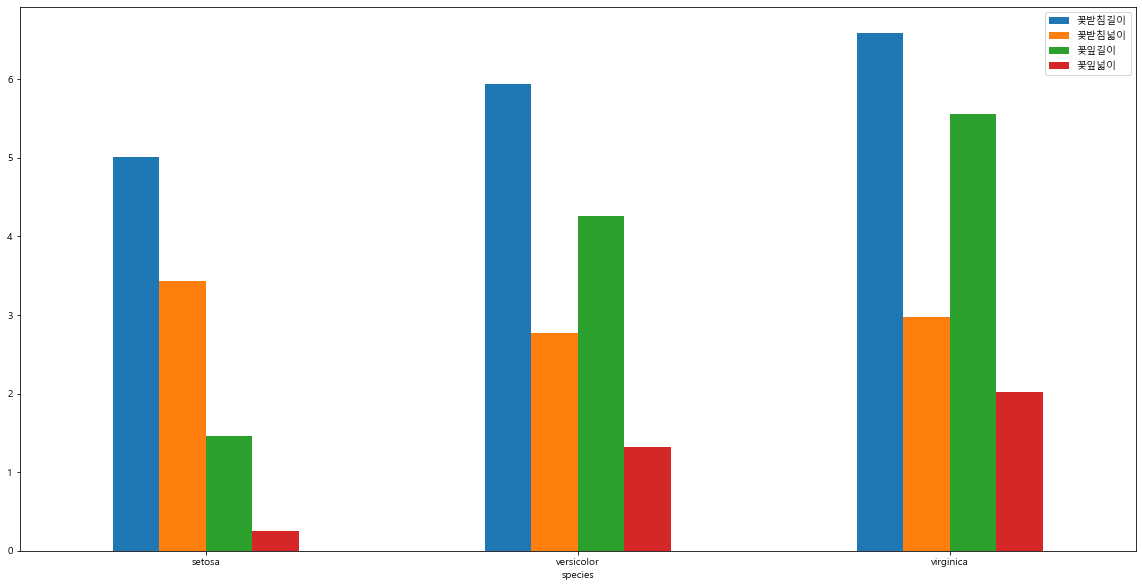

In [197]:
# 종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화한다면?
# 조건 
# sepal_length -> 꽃받침길이, sepal_width-> 꽃받침넓이,
# petal_length-> 꽃잎길이, petal_width -> 꽃잎넓이
species_subset=iris_datasets.groupby('species').agg('mean')
species_subset.rename(columns={'sepal_length':'꽃받침길이','sepal_width':'꽃받침넓이','petal_length':'꽃잎길이','petal_width':'꽃잎넓이'}, inplace=True)
display(species_subset)

plt.figure()
species_subset.plot(kind='bar',
                    figsize=(20,10),
                     rot=0)

plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

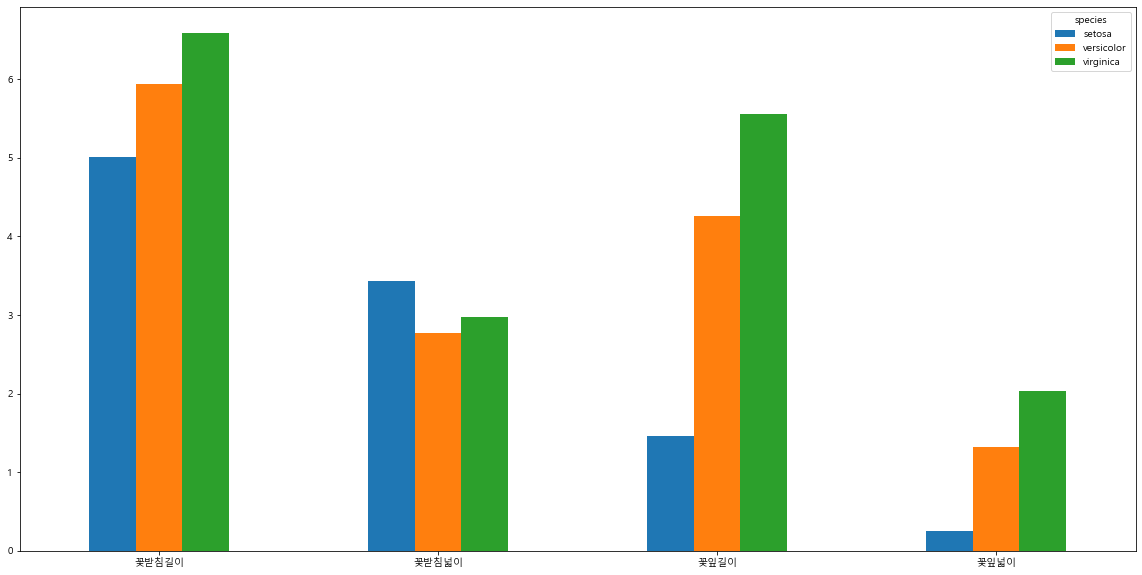

In [198]:
t_species_subset=species_subset.T
plt.figure()
t_species_subset.plot(kind='bar',
                    figsize=(20,10),
                     rot=0)

plt.show()
plt.close()

species,setosa,versicolor,virginica
꽃받침길이,5.006,5.936,6.588
꽃받침넓이,3.428,2.770,2.974
꽃잎길이,1.462,4.260,5.552
꽃잎넓이,0.246,1.326,2.026


### boxplot
- 데이터의 분포 또는 이상치를 확인하기 위한 시각화

In [200]:
iris_frm = iris_datasets.rename(columns = {
    iris_datasets.columns[0] : '꽃받침길이' ,
    iris_datasets.columns[1] : '꽃받침넓이' ,
    iris_datasets.columns[2] : '꽃잎길이' ,
    iris_datasets.columns[3] : '꽃잎넓이' ,
    iris_datasets.columns[4] : 'Y'
})
iris_frm

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


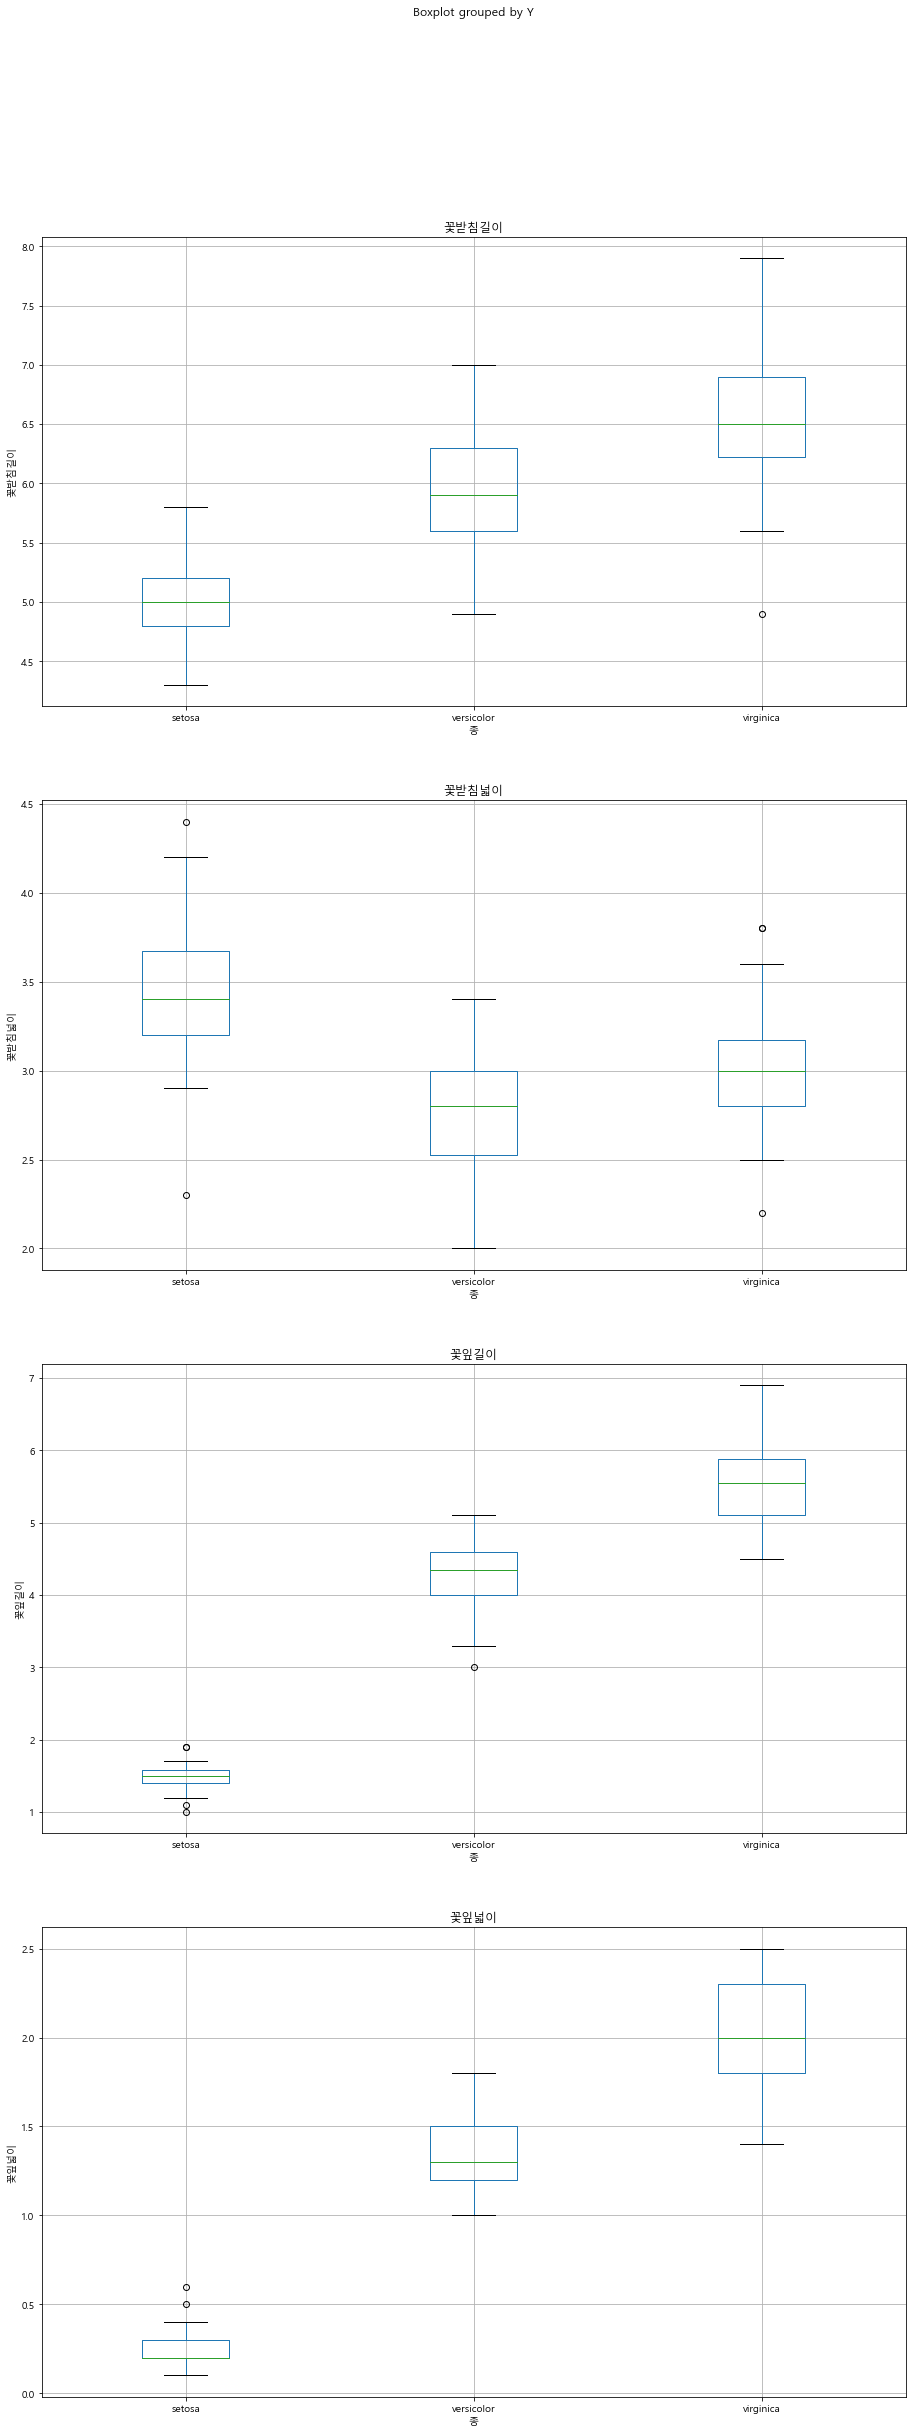

In [230]:
fig = plt.figure(figsize = (15,40))

ax01 = fig.add_subplot(4,1,1) # 어떻게 지정하는지에 따라 그래프 나오는 형태가 바뀜
ax02 = fig.add_subplot(4,1,2) # (행, 열 , 순서)
ax03 = fig.add_subplot(4,1,3)
ax04 = fig.add_subplot(4,1,4)

iris_frm[[ '꽃받침길이', 'Y']].boxplot(by='Y' , figsize=(15, 5),ax=ax01)
iris_frm[[ '꽃받침넓이', 'Y']].boxplot(by='Y' , figsize=(15, 5),ax=ax02)
iris_frm[[ '꽃잎길이', 'Y']].boxplot(by='Y' , figsize=(15, 5),ax=ax03)
iris_frm[[ '꽃잎넓이', 'Y']].boxplot(by='Y' , figsize=(15, 5),ax=ax04)

ax01.set_xlabel('종') # x축 이름지정
ax01.set_ylabel('꽃받침길이') # y축 이름지정

ax02.set_xlabel('종') # x축 이름지정
ax02.set_ylabel('꽃받침넓이') # y축 이름지정

ax03.set_xlabel('종') # x축 이름지정
ax03.set_ylabel('꽃잎길이') # y축 이름지정

ax04.set_xlabel('종') # x축 이름지정
ax04.set_ylabel('꽃잎넓이') # y축 이름지정



plt.show()
plt.close()